# **Delhi Weather Prediction** 
##################################### </b>  
**Algorithms used:**</b>  
**1.Linear Regression**</b>  
**2.Recurrent Neural Network**
  
**Comparisons are done on the basis of Errors calculated using Mean Absolute Error and Root mean squared error**

**Algorithms are comprises of some activation functions (Linear function) and optimizers (Adam Booster)**

**Importing Libraries**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **The Data** </b>  
**Let's begin with reading the dataset file into a pandas dataframe** 

In [76]:
data = pd.read_csv("DelhiWeather.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  01-01-2017  15.913043  85.869565    2.743478     59.000000
1  02-01-2017  18.500000  77.222222    2.894444   1018.277778
2  03-01-2017  17.111111  81.888889    4.016667   1018.333333
3  04-01-2017  18.700000  70.050000    4.545000   1015.700000
4  05-01-2017  18.388889  74.944444    3.300000   1014.333333


In [2]:
data.shape

(114, 5)

In [5]:
(data.describe(include='all'))

,date,meantemp,humidity,wind_speed,meanpressure
count,114,114.000000,114.000000,114.000000,114.000000
unique,114,NaN,NaN,NaN,NaN
top,01-01-2017,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,21.713079,56.258362,8.143924,1004.035090
std,NaN,6.360072,19.068083,3.588049,89.474692
min,NaN,11.000000,17.750000,1.387500,59.000000
25%,NaN,16.437198,39.625000,5.563542,1007.437500
50%,NaN,19.875000,57.750000,8.069444,1012.739317
75%,NaN,27.705357,71.902778,10.068750,1016.739583


# **Exploratory Data Analysis**

Now we will do some exploratory data analysis! We'll start by checking out missing data!

## **Missing Data**

We have done some data info extraction techniques and used seaborn to create a simple heatmap to see where we are missing data!

In [3]:
data['date'].value_counts()

01-01-2017    1
27-03-2017    1
25-03-2017    1
24-03-2017    1
23-03-2017    1
             ..
04-02-2017    1
03-02-2017    1
02-02-2017    1
01-02-2017    1
24-04-2017    1
Name: date, Length: 114, dtype: int64

In [4]:
(data.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [6]:
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


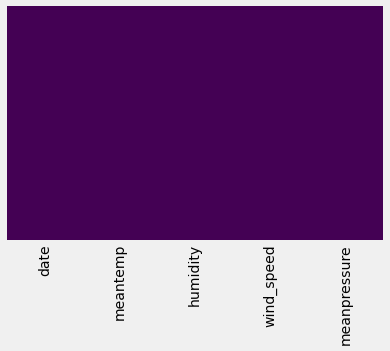

In [77]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**We can easily see that their is no missing data in the given dataset which indicates that we are good to go with analysis part of the dataset** 

In [7]:
data.corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.857726,0.217743,0.030682
humidity,-0.857726,1.000000,-0.340507,-0.097869
wind_speed,0.217743,-0.340507,1.000000,0.130352
meanpressure,0.030682,-0.097869,0.130352,1.000000


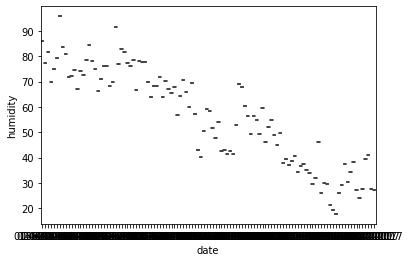

In [8]:
sns.boxplot(x='date', y='humidity', data=data)

In [9]:
data["date"] = pd.to_datetime(data["date"], format = '%d-%m-%Y')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1


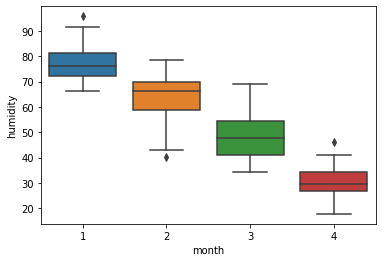

In [10]:
sns.boxplot(data=data,y="humidity",x="month")

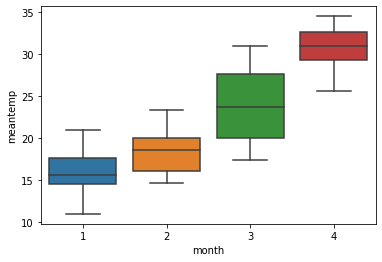

In [11]:
sns.boxplot(data=data,y="meantemp",x="month")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3f6e94700>,
      dtype=object)

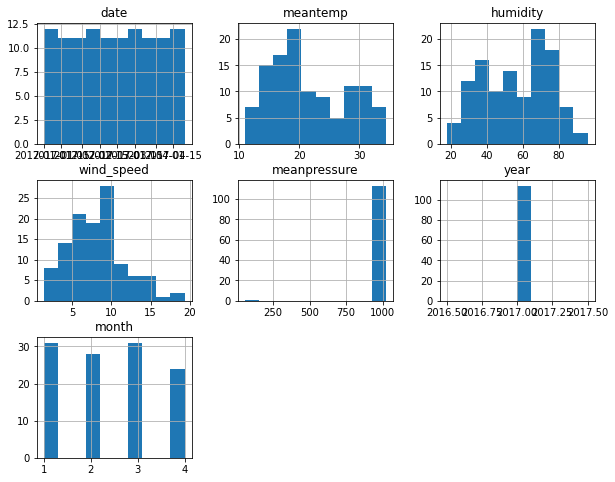

In [12]:
data.hist(figsize=(10,8))

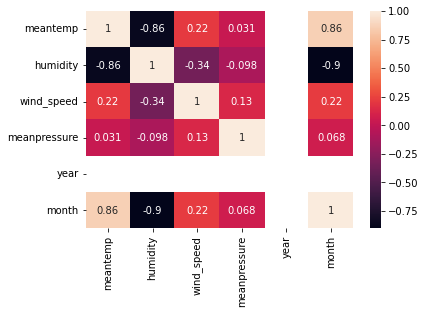

In [13]:
sns.heatmap(data.corr(),annot=True)

**In the above heatmap we can clearly find that there is strong relation between humidity v/s month and meantemp v/s humidity**

**Which indicates that we need to work on these 3 labels to predict the temperature for the next n number of days**

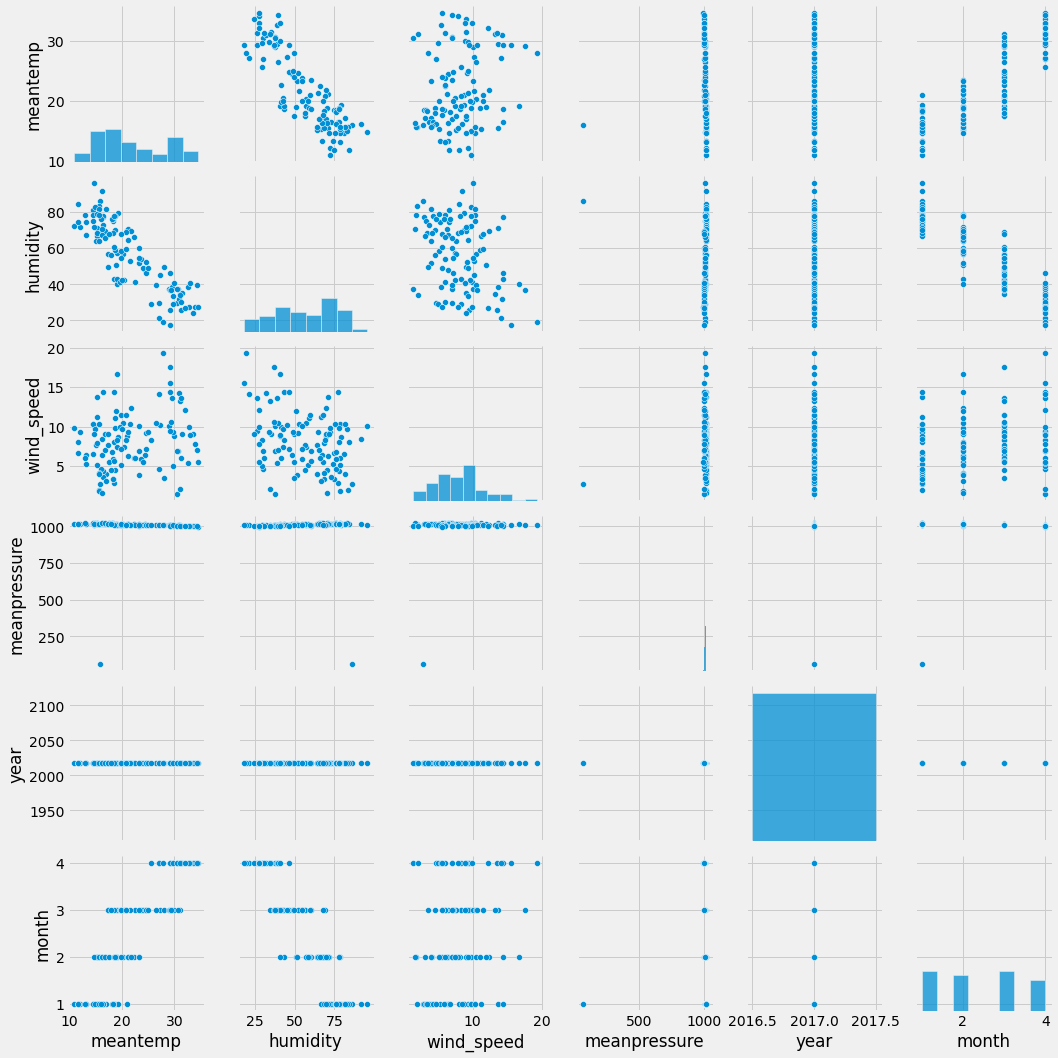

In [145]:
sns.pairplot(data, height=2.5)

In [15]:
figure = px.line(data, x="date", 
                 y="meantemp", 
                 title='Mean Temperature in Delhi Over the Months')
figure.show()

In [16]:
figure = px.line(data, x="date", 
                 y="humidity", 
                 title='Humidity in Delhi Over the Months')
figure.show()

In [17]:
figure = px.line(data, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Months')
figure.show()

In [18]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

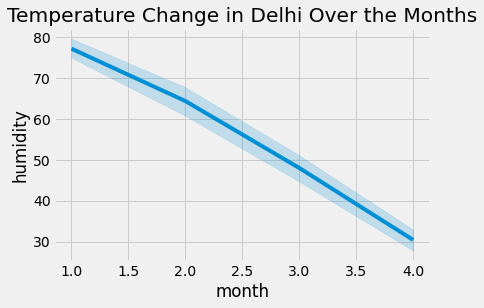

In [27]:
plt.title("Temperature Change in Delhi Over the Months")
sns.lineplot(data = data, x='month', y='humidity')
plt.show()

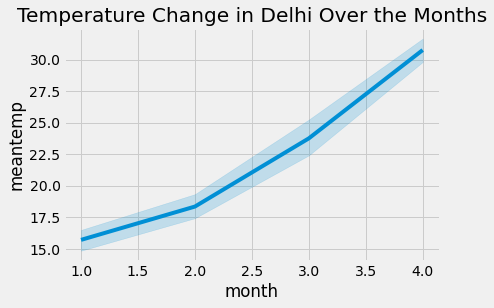

In [28]:
plt.title("Temperature Change in Delhi Over the Months")
sns.lineplot(data = data, x='month', y='meantemp')
plt.show()

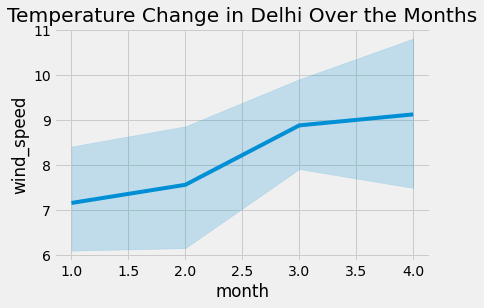

In [29]:
plt.title("Temperature Change in Delhi Over the Months")
sns.lineplot(data = data, x='month', y='wind_speed')
plt.show()

**1. From the above Exploratory Data Analysis (EDA) we can conclude that the data present in the dataset are very less to predict the temperature, because we are given with the dataset for 4 months only so to predict the temperature for the upcoming days of the next month is quite challenging.**

**2. Although we can try to predict the required result but the accuracy for the above data might come less.**

**3. We will start with the very basic algorithm for prediction of temperature as in this dataaset we are given the target label in our dataset, which means this learning will come under Supervised Learning Algorithm.** 
  
**4. Here we will be using some neural network algorithms (Recurrent Neural Network) as well so that after introducing activation functions and optimizers we can increase the accuracy of the model to an extent.** 

## **Training the Model**

**Starting with Linear Regression**

In [30]:
x=data.iloc[0:114,6].values 
y=data.iloc[0:114,2].values

**We'll be splitting the dataset in 80:20 ratio (i.e 80% Training and 20% Testing)**

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

**Here we will analyse the two most correlated labels which we have concluded above after analysis**

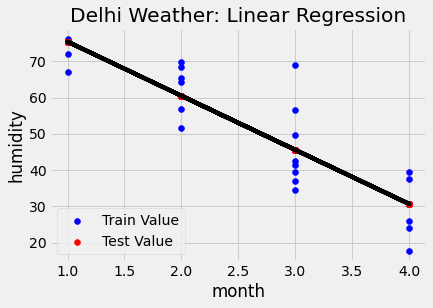

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor = regressor.fit(x_train,y_train)

y_perdicted_train = regressor.predict(x_train)

y_perdicted_test = regressor.predict(x_test)
plt.title('Delhi Weather: Linear Regression')
plt.xlabel('month')
plt.ylabel('humidity')
plt.scatter(x_train,y_train,color='blue',label="Train Value")
plt.scatter(x_test,y_perdicted_test,color='red',label="Test Value")
plt.plot(x_train,y_perdicted_train,color='black')
plt.legend()

**Now will calculate the error using two techniques:**

**1. Root Mean Squared Error**</b>  
**2. Mean Absolute Error**

In [33]:
def mean_square_error(actual,perd):
  y_perdict = np.array(perd)
  y_actual = np.array(actual)
  mean_squared_error= (1/np.size(actual)) * np.sum((y_perdict-y_actual)**2)
  return mean_squared_error

 
def mean_absolute_error(actual,perd):
  y_perdict=np.array(perd)
  y_actual=np.array(actual)
  mean_abs_error=1/(np.size(actual))*(np.sum(abs(y_perdict-y_actual)))
  return mean_abs_error
linear_hmdt_train_mse_err1 = mean_square_error(y_train,y_perdicted_train)
linear_hmdt_train_abs_err1 = mean_absolute_error(y_train,y_perdicted_train)
linear_hmdt_test_mse_err2 = mean_square_error(y_test,y_perdicted_test)
linear_hmdt_test_abs_err2 = mean_absolute_error(y_test,y_perdicted_test)
print('Linear Regression:\n')
print('Train Dataset:\n')
print('Residual Mean Squared Error for Train:',linear_hmdt_train_mse_err1)
print('Residual Mean Absolute Error for Train:',linear_hmdt_train_abs_err1)
print('\nTest Dataset:\n')
print('Residual Mean Squared Error for Test:',linear_hmdt_test_mse_err2)
print('Residual Mean Absolute Error for Test:',linear_hmdt_test_abs_err2)

Linear Regression:

Train Dataset:

Residual Mean Squared Error for Train: 75.98198058717641
Residual Mean Absolute Error for Train: 7.402120391342751

Test Dataset:

Residual Mean Squared Error for Test: 71.28592154472669
Residual Mean Absolute Error for Test: 6.576817168596707


In [34]:
x=data.iloc[0:114,6].values 
y=data.iloc[0:114,1].values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

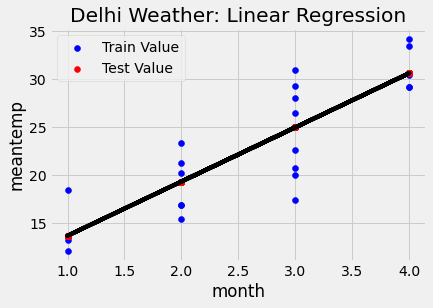

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor = regressor.fit(x_train,y_train)

y_perdicted_train = regressor.predict(x_train)

y_perdicted_test = regressor.predict(x_test)
plt.title('Delhi Weather: Linear Regression')
plt.xlabel('month')
plt.ylabel('meantemp')
plt.scatter(x_train,y_train,color='blue',label="Train Value")
plt.scatter(x_test,y_perdicted_test,color='red',label="Test Value")
plt.plot(x_train,y_perdicted_train,color='black')
plt.legend()

In [37]:
def mean_square_error(actual,perd):
  y_perdict = np.array(perd)
  y_actual = np.array(actual)
  mean_squared_error= (1/np.size(actual)) * np.sum((y_perdict-y_actual)**2)
  return mean_squared_error

 
def mean_absolute_error(actual,perd):
  y_perdict=np.array(perd)
  y_actual=np.array(actual)
  mean_abs_error=1/(np.size(actual))*(np.sum(abs(y_perdict-y_actual)))
  return mean_abs_error
linear_temp_train_mse_err1 = mean_square_error(y_train,y_perdicted_train)
linear_temp_train_abs_err1 = mean_absolute_error(y_train,y_perdicted_train)
linear_temp_test_mse_err2 = mean_square_error(y_test,y_perdicted_test)
linear_temp_test_abs_err2 = mean_absolute_error(y_test,y_perdicted_test)
print('Linear Regression:\n')
print('Train Dataset:\n')
print('Residual Mean Squared Error for Train:',linear_temp_train_mse_err1)
print('Residual Mean Absolute Error for Train:',linear_temp_train_abs_err1)
print('\nTest Dataset:\n')
print('Residual Mean Squared Error for Test:',linear_temp_test_mse_err2)
print('Residual Mean Absolute Error for Test:',linear_temp_test_abs_err2)

Linear Regression:

Train Dataset:

Residual Mean Squared Error for Train: 12.311341704721412
Residual Mean Absolute Error for Train: 2.9957794276486966

Test Dataset:

Residual Mean Squared Error for Test: 10.636479037425273
Residual Mean Absolute Error for Test: 2.6680395270361994


## **Now as we got the results of Linear Regression we will try to find the results of Recurrent Neural Network(RNN) Algorithm**

In [38]:
from sklearn.model_selection import train_test_split

**As we need to have some input data and output data so here our output data is our target label that is Temperature** 

In [39]:
X = data[['date', 'humidity', 'wind_speed']]
y = data['meantemp']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [41]:
#Feature Scaling 
train = data.iloc[:100, :]
train['date'] = train['date'].values.astype(float)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train.iloc[:,1:2].values)

<ipython-input-41-2a4a296322c8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
x_train = []
y_train = []
n_future = 14 # next 14 days temperature forecast
n_past = 30 # Past 30 days 
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [43]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional

In [65]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(x_train, y_train, epochs=800,batch_size=16)

Epoch 1/800
4/4 [==============================] - 9s 36ms/step - loss: 0.3451 - acc: 0.0351
Epoch 2/800
4/4 [==============================] - 0s 36ms/step - loss: 0.2906 - acc: 0.1228
Epoch 3/800
4/4 [==============================] - 0s 31ms/step - loss: 0.2126 - acc: 0.0702
Epoch 4/800
4/4 [==============================] - 0s 34ms/step - loss: 0.1434 - acc: 0.1930
Epoch 5/800
4/4 [==============================] - 0s 32ms/step - loss: 0.1098 - acc: 0.0877
Epoch 6/800
4/4 [==============================] - 0s 31ms/step - loss: 0.0882 - acc: 0.1579
Epoch 7/800
4/4 [==============================] - 0s 36ms/step - loss: 0.0872 - acc: 0.0526
Epoch 8/800
4/4 [==============================] - 0s 30ms/step - loss: 0.0878 - acc: 0.1228
Epoch 9/800
4/4 [==============================] - 0s 35ms/step - loss: 0.0857 - acc: 0.0351
Epoch 10/800
4/4 [==============================] - 0s 33ms/step - loss: 0.0738 - acc: 0.0526
Epoch 11/800
4/4 [==============================] - 0s 32ms/step - lo

**Now outoff 114 rows, below we have taken 100 rows values as train values and 14 rows values as test values**

In [66]:
testdataset = data.iloc[100:,1:2].values
real_temperature = data
real_temperature = real_temperature.iloc[100:,1:2].values
testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

In [67]:
predicted_temperature = regressor.predict(testing)
predicted_temperature = sc.inverse_transform(predicted_temperature)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[1],predicted_temperature.shape[0]))

1/1 [==============================] - 3s 3s/step


In [68]:
real_temperature

array([[29.25      ],
       [29.25      ],
       [29.66666667],
       [30.5       ],
       [31.22222222],
       [31.        ],
       [32.55555556],
       [34.        ],
       [33.5       ],
       [34.5       ],
       [34.25      ],
       [32.9       ],
       [32.875     ],
       [32.        ]])

In [69]:
predicted_temperature

array([[24.694525],
       [25.263805],
       [26.206644],
       [26.987976],
       [27.480942],
       [26.495625],
       [26.235004],
       [24.351048],
       [23.701965],
       [23.144112],
       [22.744984],
       [22.823753],
       [23.384666],
       [24.158733]], dtype=float32)

**Now calculating the error % to compare the results with the linear regression error % and can decide which algorithm suites well.**

In [70]:
from sklearn.metrics import mean_absolute_error

In [71]:
rnn_abs_err3 = mean_absolute_error(real_temperature, predicted_temperature)
rnn_abs_err3

7.128261578669084

**Below we have collected the record of error percentage and tabulated it, the algorithm which results in lesser error percentage will win the battle here and will be considered as best suite for the prediction of delhi temperature using this dataset.**

In [79]:
results = pd.DataFrame({
    'Models': ['LR for humidity vs month (Train MSE)',
              
              'LR for humidity vs month (Test MSE)',
              
              'LR for temp vs month (Train MSE)',
              
              'LR for temp vs month (Test MSE)'],
    'Score': [linear_hmdt_train_mse_err1,
              
              linear_hmdt_test_mse_err2,
              
              linear_temp_train_mse_err1,
             
              linear_temp_test_mse_err2,
              
              ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Models
Score,
75.981981,LR for humidity vs month (Train MSE)
71.285922,LR for humidity vs month (Test MSE)
12.311342,LR for temp vs month (Train MSE)
10.636479,LR for temp vs month (Test MSE)


In [78]:
results = pd.DataFrame({
    'Models': ['LR for humidity vs month (Train ABS)',
              
              'LR for humidity vs month (Test ABS)', 
              
              'LR for temp vs month (Train ABS)',
              
              'LR for temp vs month (Test ABS)',
              
              'RNN using Linear Activation Function'],
    'Score': [
              linear_hmdt_train_abs_err1,
             
              linear_hmdt_test_abs_err2,
             
              linear_temp_train_abs_err1,
             
              linear_temp_test_abs_err2, 
              
              rnn_abs_err3]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Models
Score,
7.402120,LR for humidity vs month (Train ABS)
7.128262,RNN using Linear Activation Function
6.576817,LR for humidity vs month (Test ABS)
2.995779,LR for temp vs month (Train ABS)
2.668040,LR for temp vs month (Test ABS)


# **Conculsion!!!**

### **So, we can easily see the difference between the error calculated between Linear Regression and Recurrent Neural Network.**

### **Linear Regression gives the best results here and the RNN is giving worst result, although it is statistically defined that for the prediction like weather the RNN algorithm is best.**

### **The factor that affected the result between the Linear Regression and Recurrent Neural Network was the ""SIZE OF DATASET"".**

### **Because when we have to do the weather prediction the first concept comes in our mind is neural network because of the size of the dataset as we know to predict the weather for the next day or month or year we need to have several years of dataset so that it will be easy for the neural network to understand the pattern and predict the weather.**

### **But here we were provided with the dataset of 4 months only and it is very challenging for the model to predict the weather for the upcoming days or months. On the basis of weather of winter and spring we want our model to predict the weather for summer, which was very challenging.**

### **So, as the temperature was increasing in a linear format so the linear regression gave the best result for the upcoming days.**

